# CNN Layers Visualization for skin cancer detection

In [219]:
%matplotlib inline
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import os

In [220]:
imgsb = ["271", "290", "298"]
imgsm = ["70", "210", "450"]

imgsb = ["../data_scaled_validation/benign/bimg-" + x + ".png" for x in imgsb]
imgsm = ["../data_scaled_validation/malign/mimg-" + x + ".png" for x in imgsm]

imgsb = [io.imread(x) for x in imgsb]
imgsm = [io.imread(x) for x in imgsm]


imgb = io.imread("../data_scaled_validation/benign/bimg-271.png")
imgm = io.imread("../data_scaled_validation/malign/mimg-445.png")


## Sample Images. Benign mole and Malign mole.

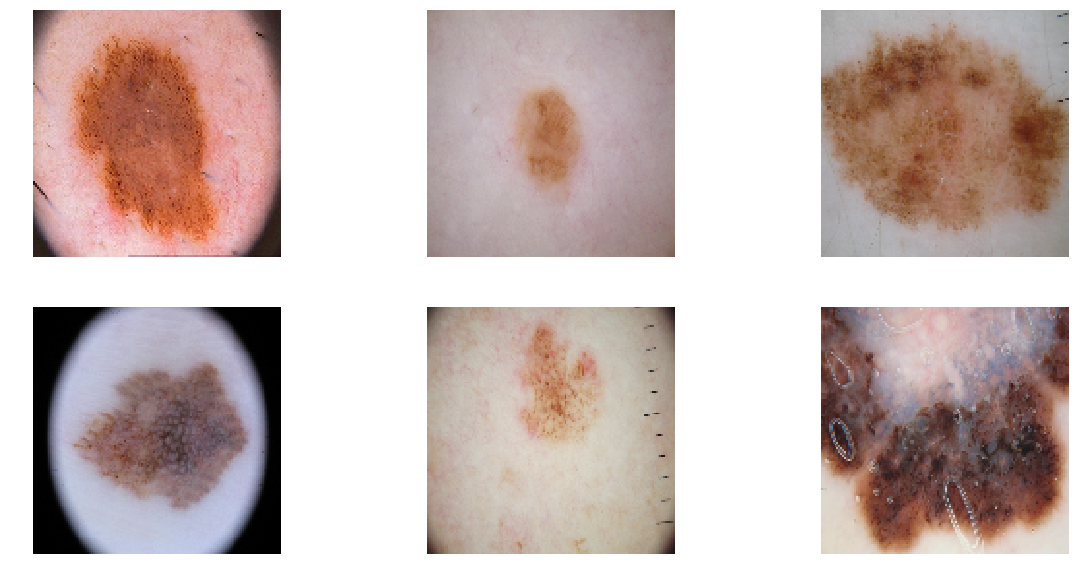

In [221]:

f, axarr = plt.subplots(2,len(imgsb))
f.set_figwidth(20)
f.set_figheight(10)
for i in range(len(imgsb)):
    axarr[0, i].imshow(imgsb[i])
    axarr[0,i].axis("off")
for i in range(len(imgsm)):
    axarr[1, i].imshow(imgsm[i])
    axarr[1,i].axis("off")



In [222]:
from keras.models import load_model

In [223]:
model = load_model('../results/Initial Testing/1-80acc-much-train.h5')

In [224]:
from keras import backend as K

def activ_viewer(model, layer_name, im_put):
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer = layer_dict[layer_name]
    activ1 = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
    activations = activ1((im_put, False))
    return activations

def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)

def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def plot_filters(filters, width=8):
    height = filters.shape[2] // width
    newimage = np.zeros((height * filters.shape[0],width*filters.shape[1]))
    for i in range(filters.shape[2]):
        y = i%width
        x = i//width
        newimage[x*filters.shape[0]:x*filters.shape[0]+filters.shape[0],
                 y*filters.shape[1]:y*filters.shape[1]+filters.shape[1]] = filters[:,:,i]
    plt.figure(figsize = (15,20))
    plt.imshow(newimage)
    plt.axis('off')
    
def plot_filters32(filters, width=8):
    newimage = np.zeros((16*filters.shape[0],16*filters.shape[1]))
    for i in range(filters.shape[2]):
        y = i%16
        x = i//16
        newimage[x*filters.shape[0]:x*filters.shape[0]+filters.shape[0],
                 y*filters.shape[1]:y*filters.shape[1]+filters.shape[1]] = filters[:,:,i]
    plt.figure(figsize = (15,25))
    plt.imshow(newimage)   

In [225]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

## Model Summary

In [226]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
__________

## Model Output

In [227]:
imgsb_reshaped = [x.reshape(1,128,128,3) for x in imgsb]
imgsm_reshaped = [x.reshape(1,128,128,3) for x in imgsm]

imgsb_out = [model.predict(x)[0][0] for x in imgsb_reshaped]
imgsm_out = [model.predict(x)[0][0] for x in imgsm_reshaped]

print("Benign")
print(imgsb_out)
print("Malignant")
print(imgsm_out)

Benign
[0.0, 4.5623074e-05, 0.9067992]
Malignant
[1.0, 1.0, 1.0]


### conv2d_1 Output

#### Benign

Model Output: 0.0
Model Output: 4.5623074e-05
Model Output: 0.9067992


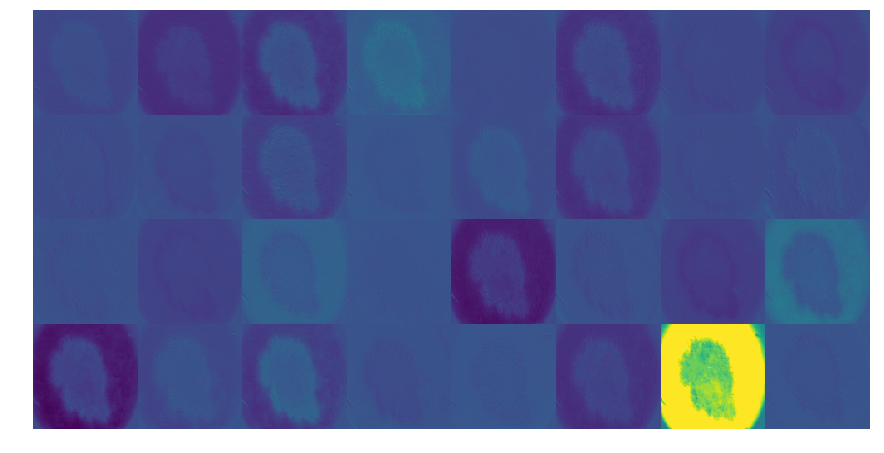

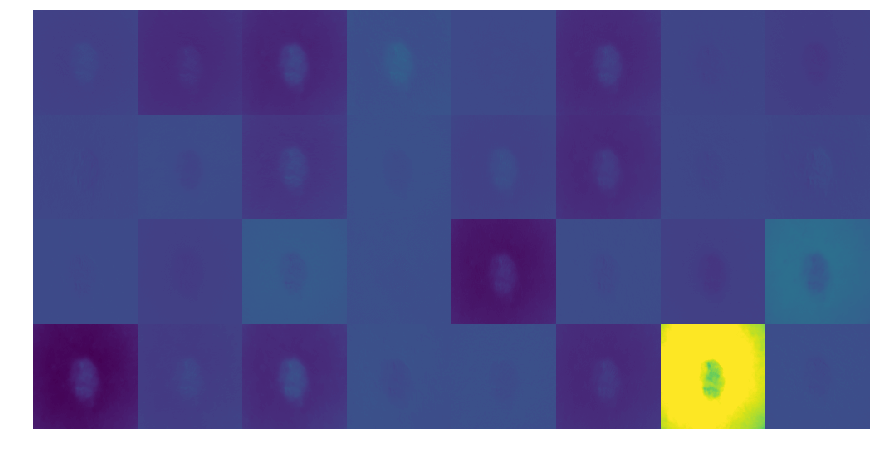

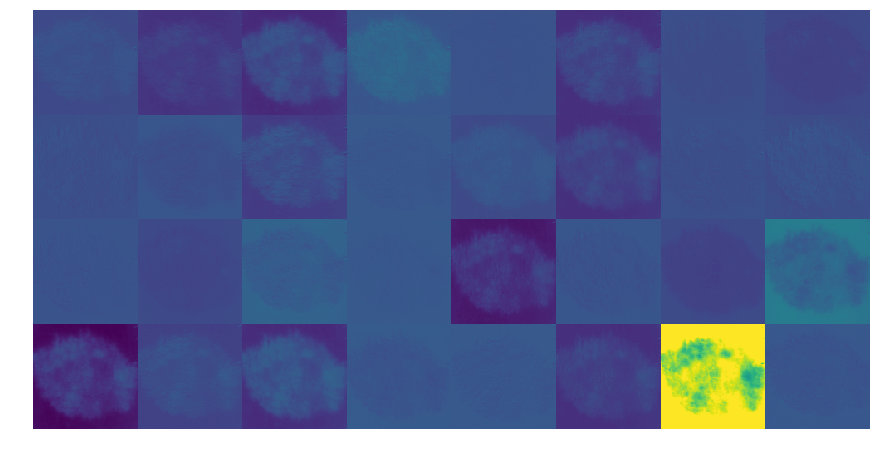

In [228]:
imgsb_deprocessed = [deprocess_image(activ_viewer(model,'conv2d_1',img)[0]) for img in imgsb_reshaped]
imgsm_deprocessed = [deprocess_image(activ_viewer(model,'conv2d_1',img)[0]) for img in imgsm_reshaped]

for img in imgsb_deprocessed:
    plot_filters(img[0])
    
for img in imgsb_reshaped:
    print ("Model Output: " + str(model.predict(img)[0][0]))

#### Malignant

Model Output: 1.0
Model Output: 1.0
Model Output: 1.0


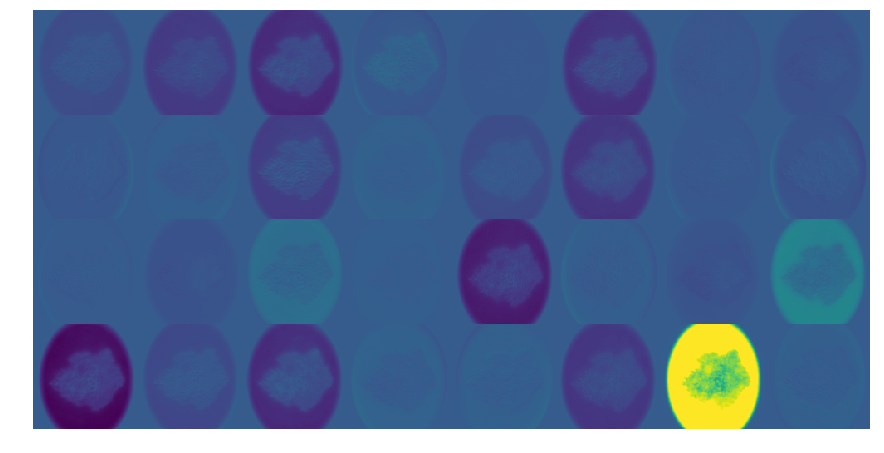

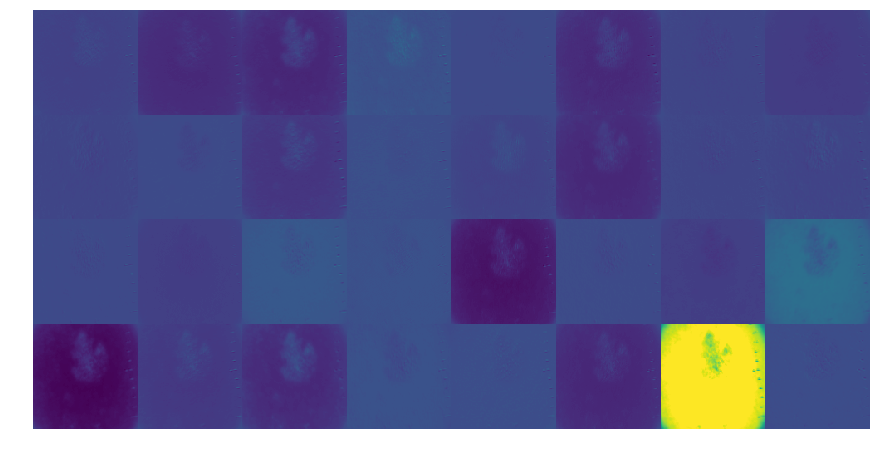

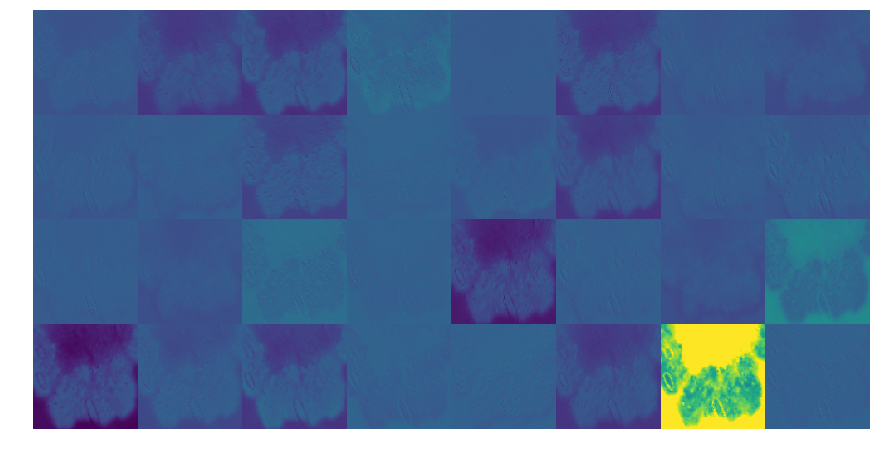

In [229]:
for img in imgsm_deprocessed:
    plot_filters(img[0])
    
for img in imgsm_reshaped:
    print ("Model Output: " + str(model.predict(img)[0][0]))

#### Zoom to some of the filters

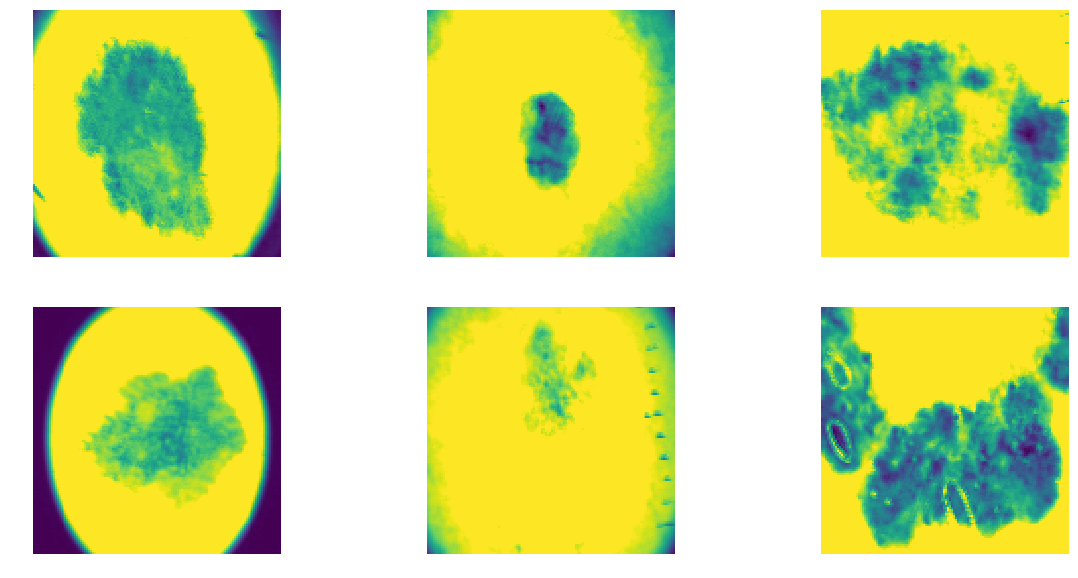

In [230]:
f, axarr = plt.subplots(2,len(imgsb))
f.set_figwidth(20)
f.set_figheight(10)
for i in range(len(imgsb)):
    axarr[0, i].imshow(imgsb_deprocessed[i][0,:,:,30])
    axarr[0,i].axis("off")
for i in range(len(imgsm)):
    axarr[1, i].imshow(imgsm_deprocessed[i][0,:,:,30])
    axarr[1,i].axis("off")

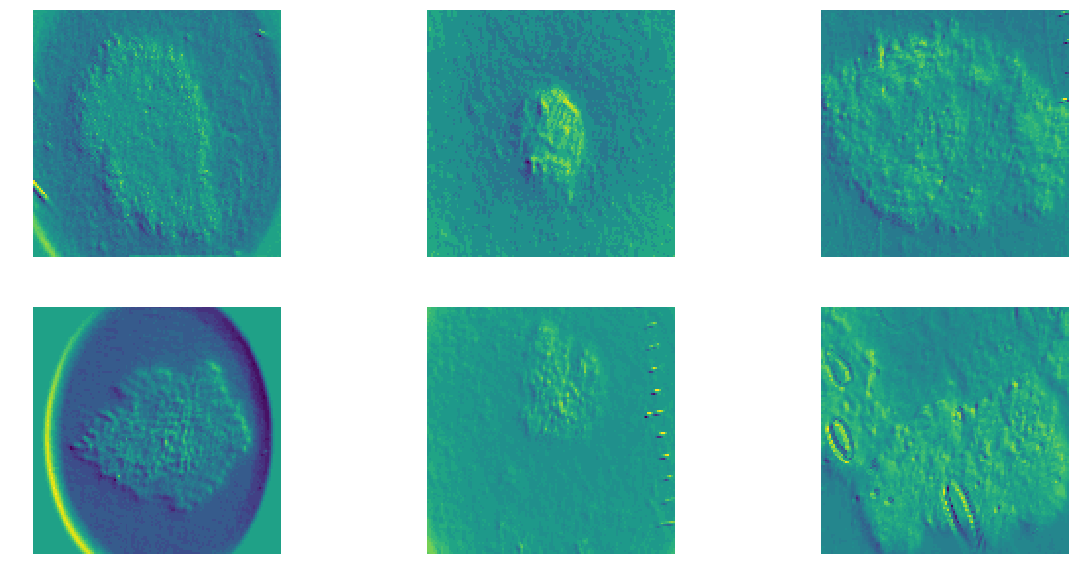

In [231]:
f, axarr = plt.subplots(2,len(imgsb))
f.set_figwidth(20)
f.set_figheight(10)
for i in range(len(imgsb)):
    axarr[0, i].imshow(imgsb_deprocessed[i][0,:,:,15])
    axarr[0,i].axis("off")
for i in range(len(imgsm)):
    axarr[1, i].imshow(imgsm_deprocessed[i][0,:,:,15])
    axarr[1,i].axis("off")


### conv2d_3 Output

#### Benign

Model Output: 0.0
Model Output: 4.5623074e-05
Model Output: 0.9067992


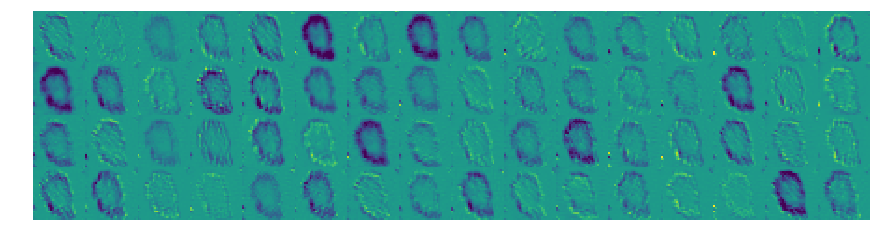

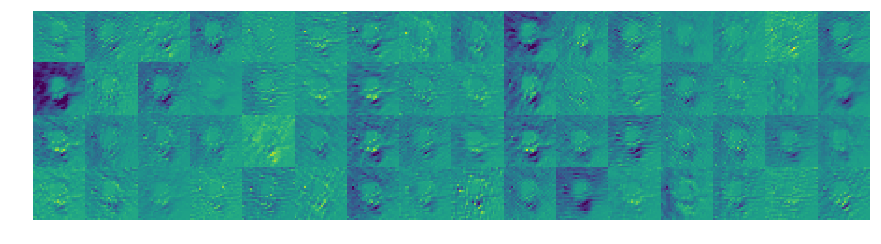

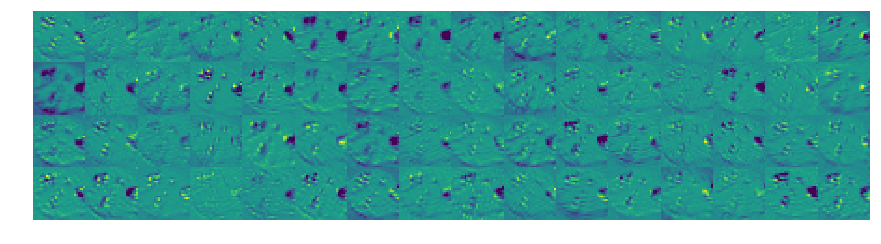

In [232]:
imgsb_deprocessed_3 = [deprocess_image(activ_viewer(model,'conv2d_3',img)[0]) for img in imgsb_reshaped]
imgsm_deprocessed_3 = [deprocess_image(activ_viewer(model,'conv2d_3',img)[0]) for img in imgsm_reshaped]

for img in imgsb_deprocessed_3:
    plot_filters(img[0], width=16)

for img in imgsb_reshaped:
    print ("Model Output: " + str(model.predict(img)[0][0]))


#### Malignant

Model Output: 1.0
Model Output: 1.0
Model Output: 1.0


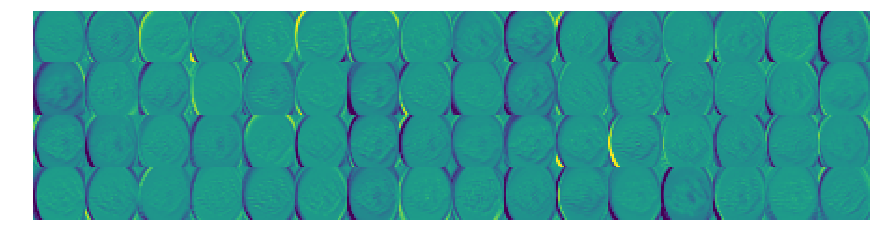

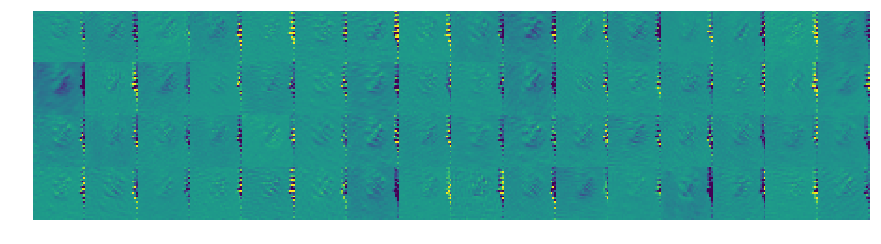

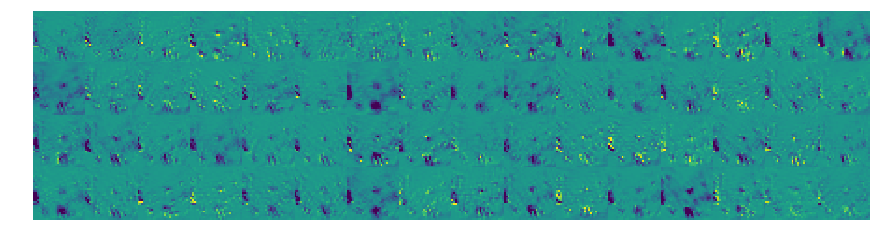

In [233]:
for img in imgsm_deprocessed_3:
    plot_filters(img[0], width=16)

for img in imgsm_reshaped:
    print ("Model Output: " + str(model.predict(img)[0][0]))

#### Zoom to some of the filters

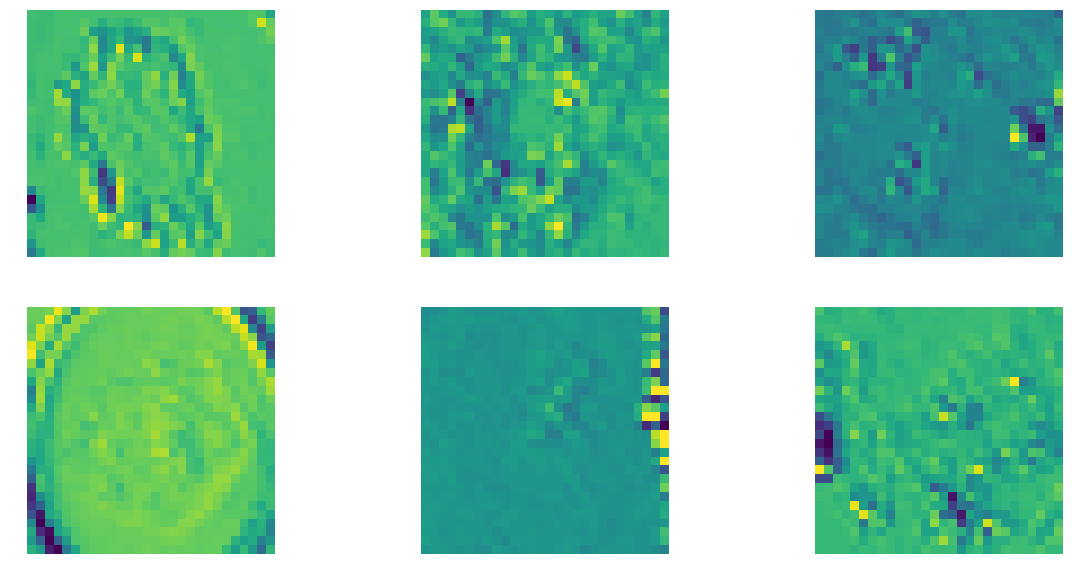

In [234]:
f, axarr = plt.subplots(2,len(imgsb))
f.set_figwidth(20)
f.set_figheight(10)
for i in range(len(imgsb)):
    axarr[0, i].imshow(imgsb_deprocessed_3[i][0,:,:,30])
    axarr[0,i].axis("off")
for i in range(len(imgsm)):
    axarr[1, i].imshow(imgsm_deprocessed_3[i][0,:,:,30])
    axarr[1,i].axis("off")

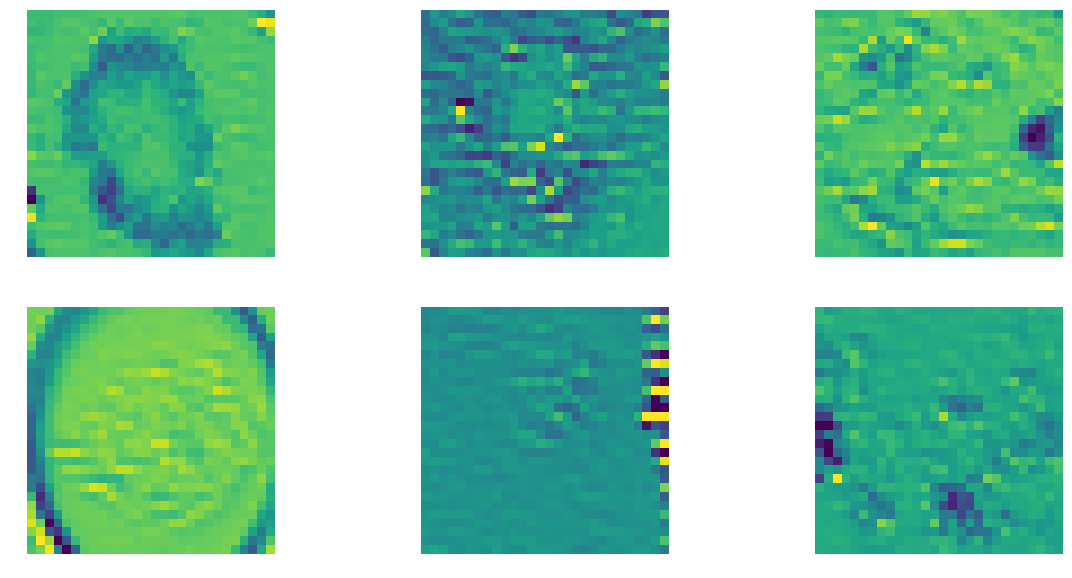

In [235]:
f, axarr = plt.subplots(2,len(imgsb))
f.set_figwidth(20)
f.set_figheight(10)
for i in range(len(imgsb)):
    axarr[0, i].imshow(imgsb_deprocessed_3[i][0,:,:,52])
    axarr[0,i].axis("off")
for i in range(len(imgsm)):
    axarr[1, i].imshow(imgsm_deprocessed_3[i][0,:,:,52])
    axarr[1,i].axis("off")